In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [77]:
train=pd.read_csv("dtrain.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [79]:
train.shape

(42000, 785)

In [80]:
train.isna().sum().sum()

0

1


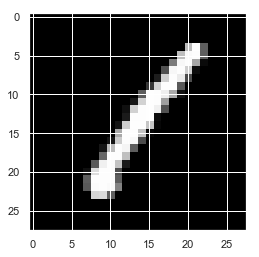

0


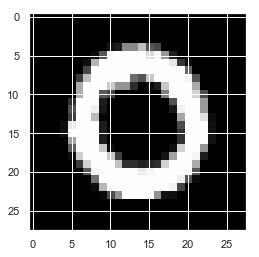

1


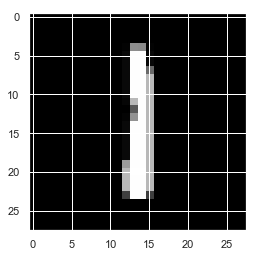

4


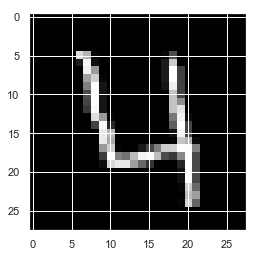

0


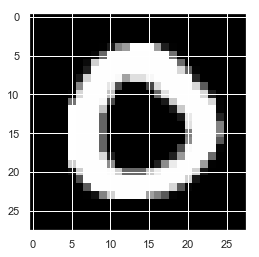

0


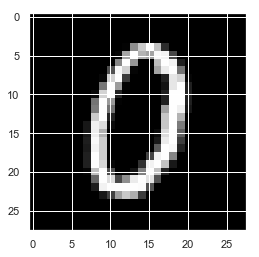

7


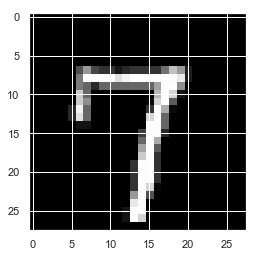

3


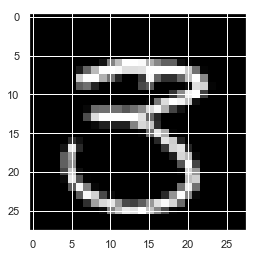

5


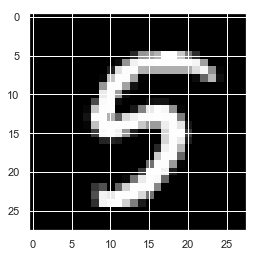

3


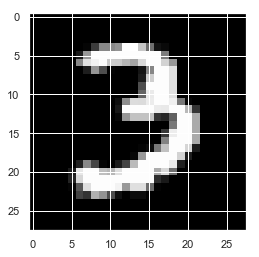

In [81]:
for i in range(10):
    n=np.array(train.iloc[i])
    m=n[0]
    n=n[1:]
    n=n.reshape(28,28)
    print(m)
    plt.show(plt.imshow(n, cmap="binary_r"))

In [82]:
x_train=train.drop("label", axis=1)
y_train=train.label

In [83]:
for i in x_train.columns:
    x_train[i].mask(x_train[i]>=100, other=255, inplace=True)
    x_train[i].mask(x_train[i]<100, other=0, inplace=True)

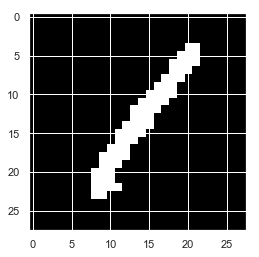

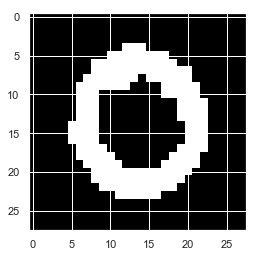

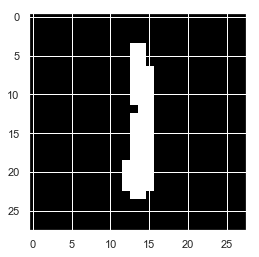

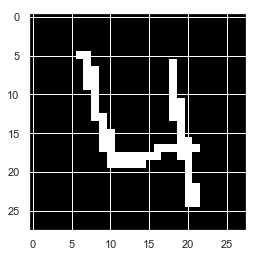

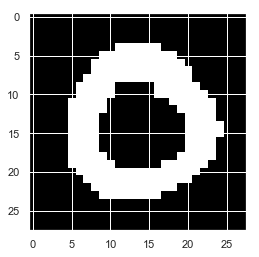

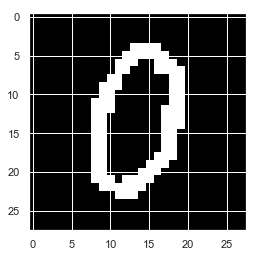

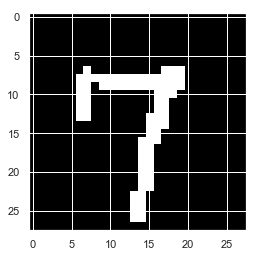

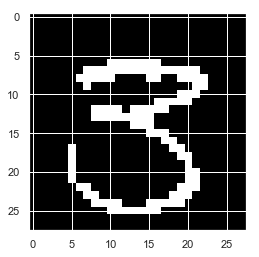

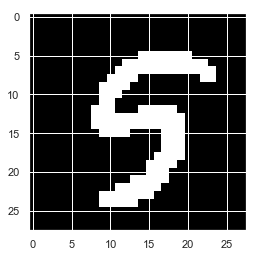

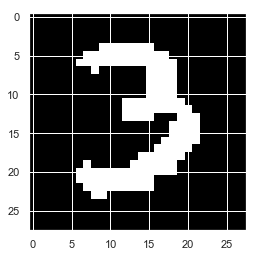

In [84]:
for i in range(10):
    n=np.array(x_train.iloc[i])
    n=n.reshape(28,28)
    plt.show(plt.imshow(n, cmap="binary_r"))

In [85]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier()
ranfor.fit(x_train,y_train)

C:\Users\E 460\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
test=pd.read_csv("dtest.csv")

In [87]:
for i in test.columns:
    test[i].mask(test[i]>=100, other=255, inplace=True)
    test[i].mask(test[i]<100, other=0, inplace=True)

In [88]:
ans=ranfor.predict(test)
ans=pd.DataFrame(ans,columns=["Label"],index=list(range(1,28001)))

In [89]:
ans.to_csv("D:\Data\dytest.csv")